# Week 1 Programming Assignment 

Remark: 

(1) There are 9 problems, among which 7 problems are for 10 points whlie the other 2 problems are optional. Although the optional problems will not be counted, you are suggested to finish them as possible as you can.

(2) Please upload your solutions of this assignment to Canvas with a file named "Programming_Assignment_1 _yourname.ipynb" before 11:59pm May 23.

=================================================================================================================

### **Problem 1 (1 pt).** Plot the curve of function 
### $$f(x) = x^3 - x,~~ x \in[-1,1].$$

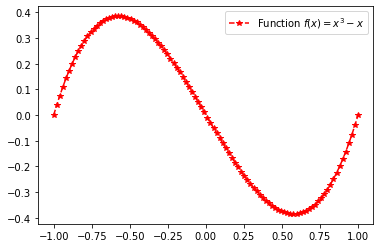

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3-x

x=torch.linspace(-1, 1, 100)

plt.plot(x, f(x), '*--r', label='Function $f(x)=x^3-x$') 

plt.legend()

=================================================================================================================

### **Problem 2 (2 pts).** 
### (1) Find the two roots of the function
### $$f(x) = 2x^2 - x - 1,~~ x \in[-1,2].$$

### (2) Plot the curve of the function $f(x)$ defined in (1) and mark all the roots on the curve.

The first root is: [-0.5]
The second root is: [1.]


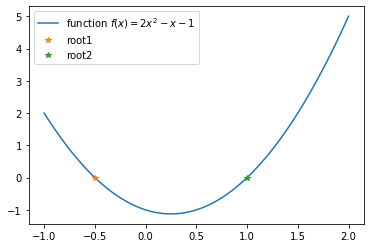

In [4]:
#question (1)
from scipy.optimize import fsolve
def f(x):
    return 2*x**2-x-1

x0 = fsolve(f, 0)
x1 = fsolve(f, 1)
print('The first root is:', x0)
print('The second root is:', x1)

#question (2)
x = np.linspace(-1, 2, 1000)

plt.plot(x, f(x),'-', label='function $f(x)=2x^2-x-1$')
plt.plot(x0, f(x0), '*',label='root1')
plt.plot(x1, f(x1), '*',label='root2')
plt.legend()

=================================================================================================================

### **Problem 3 (optional)**.  Given $P=\begin{bmatrix} 1 & 2 \\ 3 & 4\end{bmatrix}$, investigate the two different multiplications $P*P$ and $torch.mm(P,P)$.

=================================================================================================================

### **Problem 4 (1 pt).**  Given 
### $$A=\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}, ~~ b=\begin{bmatrix} 1  \\ 2 \\ 3\end{bmatrix}.$$
### Solve $A^2 x = b.$

In [10]:
import torch
import numpy as np


A = torch.tensor([[1,2,3],[4,5,6],[7,8,9]],dtype=torch.float32)
print('A is', A)

print('\n') 

A_sqr=torch.mm(A,A)
print('A^2 is', A_sqr)

print('\n') 

b = torch.tensor([[1],[2],[3]],dtype=torch.float32) 
print('b is', b)

x, LU =torch.solve(b,A_sqr) 

print('\n') 

print('x is', x)



A is tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


A^2 is tensor([[ 30.,  36.,  42.],
        [ 66.,  81.,  96.],
        [102., 126., 150.]])


b is tensor([[1.],
        [2.],
        [3.]])


x is tensor([[-0.0010],
        [ 0.2241],
        [-0.1676]])


=================================================================================================================

### **Problem 5 (1 pt).**  Given $f(x,y) = x^2+y^2+(xy)^3$, compute $\frac{\partial f(x,y)}{\partial y}$ at $x=1,y=2$.

In [12]:
# In order to calculate the gradient with respect to a tensor, we should set the requires_grad flag to True.
y = torch.tensor([2.0], requires_grad=True)
x = torch.tensor([1.0])

# By default, requires_grad is set to False if possible.
print('x requires_grad?', x.requires_grad)
print('y requires_grad?', y.requires_grad)

z = x**2+y**2+(x*y)**3
print('z.requires_grad?', z.requires_grad)


grad = torch.autograd.grad(outputs=z, inputs=y) 
print(grad)

x requires_grad? False
y requires_grad? True
z.requires_grad? True
(tensor([16.]),)


=================================================================================================================

### **Problem 6 (optional).** Define a function to find the minimum of three numbers $a,~b,~c$. Test your code and print the minimum of the three numbers, where $a=\sqrt{2},~ b=\frac{4}{3},~ c=0.5e$.

=================================================================================================================


### **Problem 7 (1 pt).** Define a function to find the maximum and minimum of a sequence with n numbers.

Hint: x = np.random.randint(a,b,size=n) can randomly generate n numbers (saved in a row vector x ) and each number is between a and b.


In [18]:
def f_max(alist):
    length=len(alist)
    max_value = alist[0]
    min_value = alist[0]
    i=1
    while i<length:
        if alist[i]> max_value:
            max_value = alist[i]
        elif alist[i]<min_value:
            min_value = alist[i]
        i=i+1
    return max_value, min_value

#given an example to test it
alist=[-43,4,5,6,3,87,27,-9,10,8,13,16,-3]
print('the sequence is',alist)
print('The maximum and minimun of the given list are:',f_max(alist))

the sequence is [-43, 4, 5, 6, 3, 87, 27, -9, 10, 8, 13, 16, -3]
The maximum and minimun of the given list are: (87, -43)


=================================================================================================================

### **Problem 8 (1 pt).**  Define a function to sort a sequence with n numbers in ascending order.


In [25]:
def f_sort(alist):
    length=len(alist)
    j=0
    for j in range(0,length):
        i=0
        while i<length-1:
            if alist[i+1]<alist[i]:
                a=alist[i]
                alist[i]=alist[i+1]
                alist[i+1]=a
            i=i+1
        
    return alist

#given an example to test it
alist=[-43,4,5,6,3,87,27,-9,10,8,13,16,-3]
print('the sequence is',alist)
print('The sorted version of the list is:',f_sort(alist))

the sequence is [-43, 4, 5, 6, 3, 87, 27, -9, 10, 8, 13, 16, -3]
The sorted version of the list is: [-43, -9, -3, 3, 4, 5, 6, 8, 10, 13, 16, 27, 87]


=================================================================================================================

### **Problem 9 (3 pts).**  Given a function 
### $$f(x,y)=(x-2)^2 + y^2 + 2(y-4)^2 + 2x^2 + 2xy + 4y -16x +1.$$
### Please write a code to apply gradient descent method to find the minimum of $f(x,y)$ with initial value $x=y=0$.


In [10]:
import torch
import numpy as np

x = torch.tensor([[0.0],[0.0]],requires_grad=True)
n=0
def f_optim(tolerance,learning_rate,x,n):
    if learning_rate<0 or learning_rate==0:
        return('wrong learning rate')
    z = (x[0]-2)**2+x[1]**2+2*(x[1]-4)**2+2*x[0]**2+2*x[0]*x[1]+4*x[1]-16*x[0]+1
    grad = torch.autograd.grad(outputs=z, inputs=x)[0]
    while torch.norm(grad)>tolerance:
        x=x-learning_rate*grad
        z = (x[0]-2)**2+x[1]**2+2*(x[1]-4)**2+2*x[0]**2+2*x[0]*x[1]+4*x[1]-16*x[0]+1
        grad = torch.autograd.grad(outputs=z, inputs=x)[0]
        if n==500:
            return('not reachable wl this tolerance and learning rate, since 500 iterations reaches. Please change the tolerance or learnin and do it again.')
        else:
            n=n+1
    return x,n

print('The argmin obtained by presenting gradient descent from initial condition x=y=0 and numbers of steps are',f_optim(10**-4,0.1,x,n))
print('The argmin obtained by presenting gradient descent from initial condition x=y=0 and numbers of steps are',f_optim(10**-4,0.01,x,n))
print('The argmin obtained by presenting gradient descent from initial condition x=y=0 and numbers of steps are',f_optim(10**-5,0.1,x,n))
print('The argmin obtained by presenting gradient descent from initial condition x=y=0 and numbers of steps are',f_optim(10**-5,0.01,x,n))

print('\n')
x=[3,1]
print('by using gradient descent, we know the argmin for f is (3,1) and minimun is',(x[0]-2)**2+x[1]**2+2*(x[1]-4)**2+2*x[0]**2+2*x[0]*x[1]+4*x[1]-16*x[0]+1)

The argmin obtained by presenting gradient descent from initial condition x=y=0 and numbers of steps are (tensor([[3.0000],
        [1.0000]], grad_fn=<SubBackward0>), 22)
The argmin obtained by presenting gradient descent from initial condition x=y=0 and numbers of steps are (tensor([[3.0000],
        [1.0000]], grad_fn=<SubBackward0>), 269)
The argmin obtained by presenting gradient descent from initial condition x=y=0 and numbers of steps are (tensor([[3.0000],
        [1.0000]], grad_fn=<SubBackward0>), 26)
The argmin obtained by presenting gradient descent from initial condition x=y=0 and numbers of steps are not reachable wl this tolerance and learning rate, since 500 iterations reaches. Please change the tolerance or learnin and do it again.


by using gradient descent, we know the argmin for f is (3,1) and minimun is 1
